In [1]:
#https://habr.com/ru/post/441006/
#https://www.machinelearningmastery.ru/introduction-to-image-segmentation-with-k-means-clustering-83fd0a9e2fc3/

In [2]:
!apt-get install cmake  -y
!pip install opencv-python
!pip install imutils
!pip install MulticoreTSNE
!pip install seaborn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from skimage import io
import imutils
import cv2
import tqdm
import pandas as pd
import seaborn as sns


In [4]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

In [5]:
images = io.ImageCollection('./img/*.jpg')
print('Type:', type(images))
#images.files

Type: <class 'skimage.io.collection.ImageCollection'>


In [6]:
images[0]

array([[[230, 230, 232],
        [229, 229, 231],
        [229, 229, 231],
        ...,
        [212, 209, 194],
        [212, 209, 194],
        [212, 209, 194]],

       [[230, 230, 232],
        [229, 229, 231],
        [229, 229, 231],
        ...,
        [212, 209, 194],
        [212, 209, 194],
        [212, 209, 194]],

       [[230, 230, 232],
        [229, 229, 231],
        [229, 229, 231],
        ...,
        [212, 209, 194],
        [212, 209, 194],
        [212, 209, 194]],

       ...,

       [[188, 189, 191],
        [191, 192, 194],
        [190, 191, 193],
        ...,
        [197, 193, 190],
        [197, 193, 190],
        [197, 193, 190]],

       [[190, 191, 195],
        [195, 196, 198],
        [195, 196, 198],
        ...,
        [197, 193, 190],
        [197, 193, 190],
        [197, 193, 190]],

       [[185, 189, 192],
        [192, 196, 197],
        [194, 195, 197],
        ...,
        [197, 193, 190],
        [197, 193, 190],
        [197, 193, 190]]

In [7]:
class_data=[]
name_file=[]
for clas in images.files:    
    class_data.append(clas.split('__')[1].split('_')[1])
    name_file.append(clas.split('/')[-1])
class_data

['БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',
 'БТИ',


In [8]:
clas.split('__')

['./img/out', 'Dataset_Свид._АГР_70', '0001.jpg']

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd7de7af1d0>)

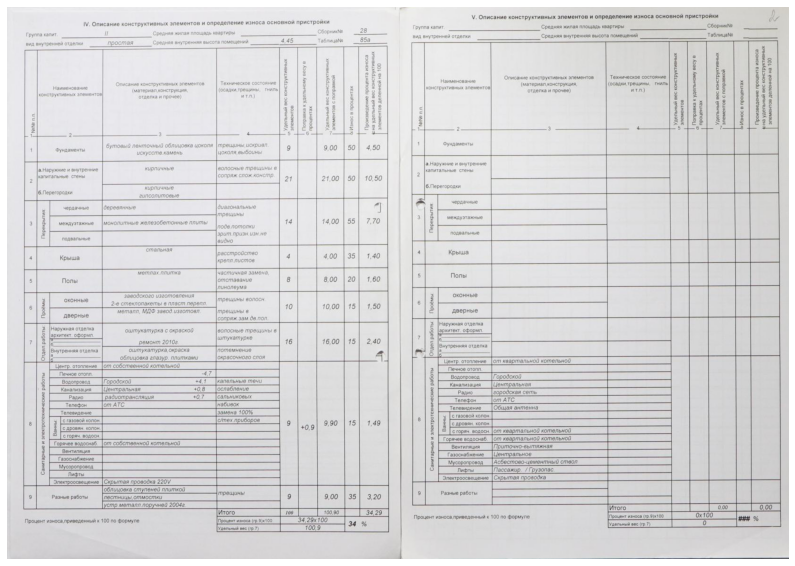

In [9]:
imgtext = images[20]
image_show(imgtext)

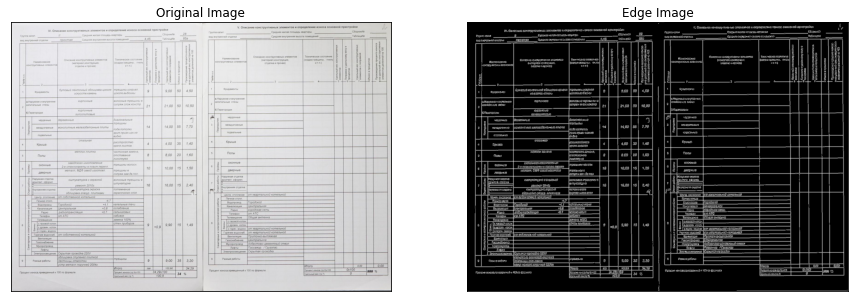

In [10]:

edges = cv2.Canny(imgtext,150,200)
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(imgtext)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

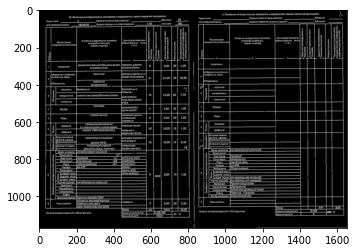

In [11]:
plt.imshow(edges,cmap = 'gray')

In [12]:
pd.DataFrame(edges).sum(axis=0)

0         0
1         0
2         0
3         0
4         0
       ... 
1649    255
1650    255
1651    255
1652    255
1653    255
Length: 1654, dtype: int64

In [13]:
import tqdm

In [14]:
gran=[]
blue=[]

BLUE_MIN = np.array([0, 0, 150], np.uint8)    
BLUE_MAX = np.array([150, 150, 255], np.uint8)  
for i in tqdm.tqdm_notebook(range(len(images))):
    edges = cv2.Canny(images[i] ,150,200)
    edges=cv2.resize(edges, (512, 1024)) 
    gran.append(edges)



    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [16]:
!nvidia-smi

Sat Oct 31 19:46:54 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.100      Driver Version: 440.100      CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:02:00.0 Off |                  N/A |
|  0%   32C    P8     8W / 198W |     27MiB /  8118MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [17]:
import os
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true" 
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" 
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [18]:
!$LD_LIBRARY_PATH

/bin/sh: 1: /usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/lib64:/usr/include/x64_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/cuda-10.2/targets/x86_64-linux/lib: not found


In [19]:
granS=np.array(gran)
granS = granS.astype('float32') / 255.
granS = granS[..., tf.newaxis]

print(granS.shape)

(1614, 1024, 512, 1)


In [20]:
from sklearn.model_selection import train_test_split
train_X, test_X= train_test_split(granS, test_size=0.2, random_state=42)

In [21]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(1024, 512,1)), 
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(4, (5,5), activation='relu', padding='same', strides=4),
      layers.Conv2D(2, (3,3), activation='relu', padding='same', strides=2)])
    
    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(2, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(4, kernel_size=5, strides=4, activation='relu', padding='same'),
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [22]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())


In [23]:
autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 256, 8)       80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 64, 4)        804       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 32, 2)         74        
Total params: 958
Trainable params: 958
Non-trainable params: 0
_________________________________________________________________


In [24]:
autoencoder.fit(granS, granS,batch_size=16,
                epochs=15,
                shuffle=True,
                validation_data=(test_X, test_X))

Epoch 1/15
101/101 [==============================] - 14s 143ms/step - loss: 0.1195 - val_loss: 0.0580
Epoch 2/15
101/101 [==============================] - 14s 143ms/step - loss: 0.0561 - val_loss: 0.0573
Epoch 3/15
101/101 [==============================] - 14s 142ms/step - loss: 0.0492 - val_loss: 0.0435
Epoch 4/15
101/101 [==============================] - 15s 144ms/step - loss: 0.0409 - val_loss: 0.0407
Epoch 5/15
101/101 [==============================] - 15s 149ms/step - loss: 0.0391 - val_loss: 0.0399
Epoch 6/15
101/101 [==============================] - 15s 150ms/step - loss: 0.0385 - val_loss: 0.0393
Epoch 7/15
101/101 [==============================] - 15s 148ms/step - loss: 0.0375 - val_loss: 0.0377
Epoch 8/15
101/101 [==============================] - 15s 144ms/step - loss: 0.0356 - val_loss: 0.0359
Epoch 9/15
101/101 [==============================] - 15s 144ms/step - loss: 0.0343 - val_loss: 0.0351
Epoch 10/15
101/101 [==============================] - 15s 145ms/step - l

In [25]:
#78s 3s/step
#loss: 0.0596 - val_loss: 0.0595

In [26]:
with tf.device('/CPU:0'):
    encoded_imgs = autoencoder.encoder(granS).numpy()
    encoded_imgs=encoded_imgs[:,:,:,0]
    print(encoded_imgs.shape)
    encoded_imgs=pd.DataFrame(encoded_imgs.reshape(-1,64*32))

(1614, 64, 32)


In [27]:
encoded_imgs_temp=encoded_imgs
class_data_temp=class_data

In [28]:
import matplotlib.pyplot as plt
from MulticoreTSNE import MulticoreTSNE as TSNE

# Определяем модель и скорость обучения
model = TSNE(n_iter=5000,n_jobs=23)

# Обучаем модель
transformed = model.fit_transform(encoded_imgs_temp)

# Представляем результат в двумерных координатах
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

In [29]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
class_L = LE.fit_transform(class_data_temp)

class_L

array([0, 0, 0, ..., 3, 3, 3])

No handles with labels found to put in legend.


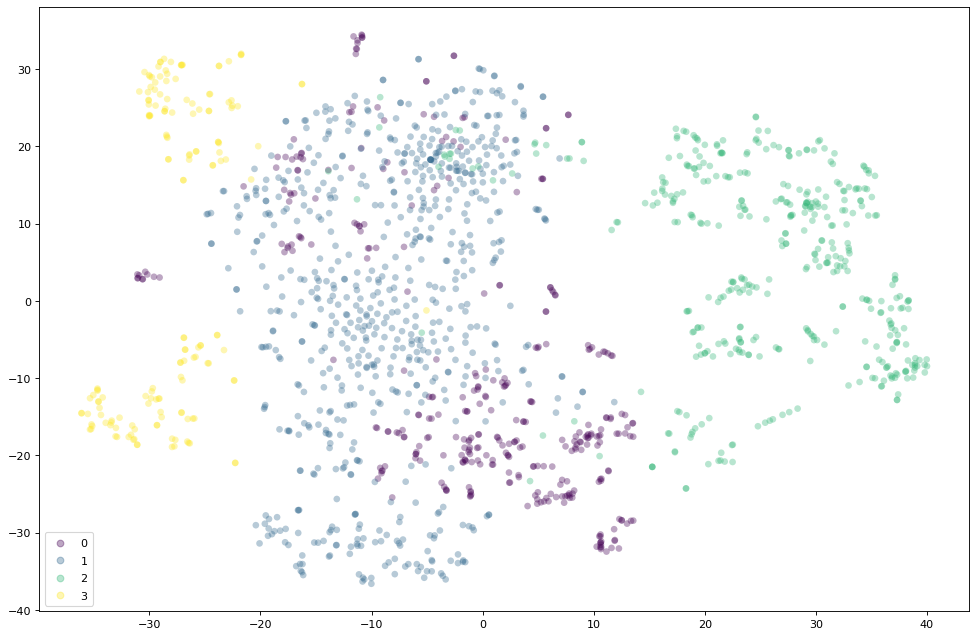

In [30]:
plt.figure(figsize=(15, 10), dpi=80)
scatter=plt.scatter(x_axis, y_axis,c=class_L,alpha=0.35, edgecolors='none')
plt.legend()
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower left")


plt.show()

In [31]:
#https://proglib.io/p/unsupervised-ml-with-python/

In [32]:
from sklearn import datasets
from sklearn.cluster import KMeans

model = KMeans(n_clusters=30)
model.fit(encoded_imgs_temp)
predicted_label = model.predict(encoded_imgs_temp)
predicted_label

array([28, 20, 10, ..., 18, 19, 15], dtype=int32)

In [33]:
predicted_label.max()

29

In [39]:
for i in tqdm.tqdm_notebook(range(len(granS))):
    if not os.path.exists('./sort/class'+ str(predicted_label[i]) + '/'):
        os.makedirs('./sort/class'+ str(predicted_label[i]) + '/')
    cv2.imwrite('./sort/class'+ str(predicted_label[i]) + '/'+str(name_file[i][:-4])+'.jpg', (images[i]),[cv2.IMWRITE_JPEG_QUALITY, 80])


    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.
